# Class Proportion Estimation

In [1]:
# remove after testing
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from mclearn.classifier import print_classification_result, predict_unlabelled_objects, map_unlabelled_objects
from mclearn.tools import load_results, results_exist, save_results
from mclearn.preprocessing import balanced_train_test_split
%matplotlib inline
plt.style.use('ggplot')

In [3]:
fig_dir = '../thesis/figures/4_expt1/'
scaler_path = '../pickle/01_dataset_prepration/sdss_scaler.pickle'
forest_path = '../pickle/05_class_proportion_estimation/forest.pickle'
target_col = 'class'
feature_cols = ['ra', 'dec', 'psfMag_r_w14', 'psf_u_g_w14', 'psf_g_r_w14', 'psf_r_i_w14',
                'psf_i_z_w14', 'petroMag_r_w14', 'petro_u_g_w14', 'petro_g_r_w14',
                'petro_r_i_w14', 'petro_i_z_w14', 'petroRad_r']

In [4]:
sdss = pd.read_hdf('../data/sdss.h5', 'sdss')

Here's the confusion matrix:


Predicted              
                 Galaxy Quasar   Star
Actual Galaxy     97608   1892    500
       Quasar      2801  93376   3823
       Star        1633   8878  89489

The balanced accuracy rate is 93.49%.
Classification report:
             precision    recall  f1-score   support

     Galaxy     0.9565    0.9761    0.9662    100000
       Star     0.9539    0.8949    0.9235    100000
     Quasar     0.8966    0.9338    0.9148    100000

avg / total     0.9357    0.9349    0.9348    300000

Recall Maps of Galaxies, Stars, and Quasars, respectively:


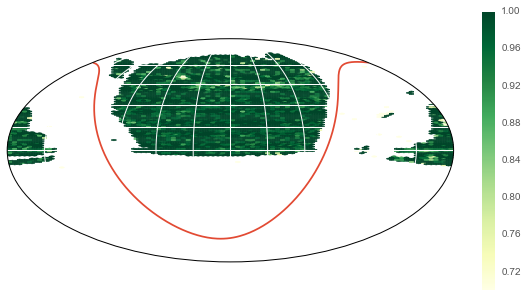

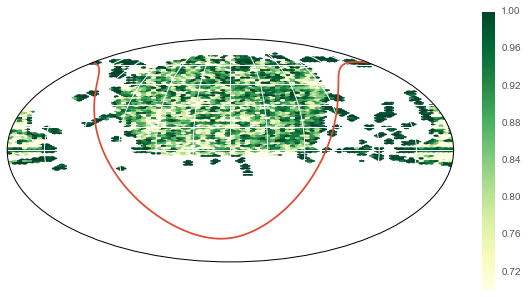

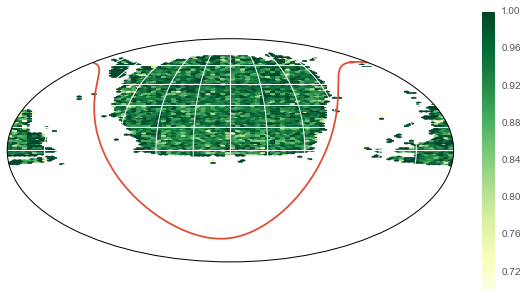

In [5]:
X_train, X_test, y_train, y_test = balanced_train_test_split(sdss[feature_cols],
        sdss[target_col], train_size=279000*3, test_size=100000*3, random_state=11)
    
# separate features and coordinates
coords_train = X_train[:, 0:2]
coords_test = X_test[:, 0:2]
X_train = X_train[:, 2:]
X_test = X_test[:, 2:]
    
if not results_exist(forest_path):
    forest = RandomForestClassifier(n_estimators=300, n_jobs=-1, class_weight='subsample', random_state=23)   
    forest.fit(X_train, y_train)
    save_results(forest, forest_path)
    

forest = load_results(forest_path)
correct_boolean, confusion = print_classification_result(X_train, X_test, y_train, y_test,
    classifier=forest, coords_test=coords_test, output='forest all', fig_dir=fig_dir, trained=True)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

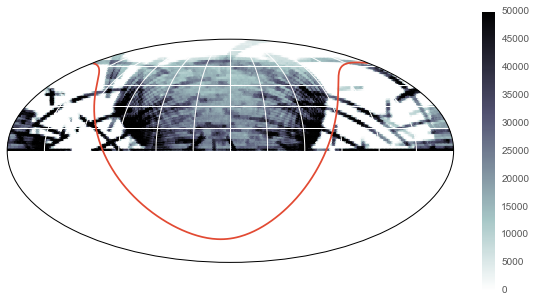

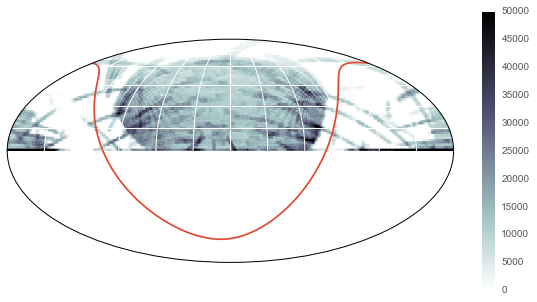

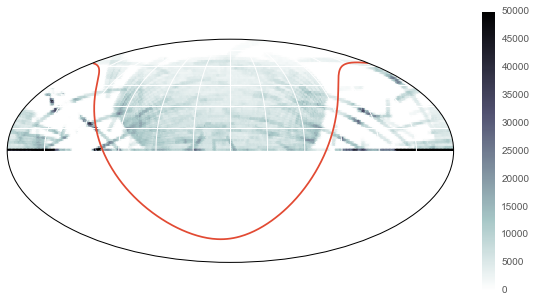

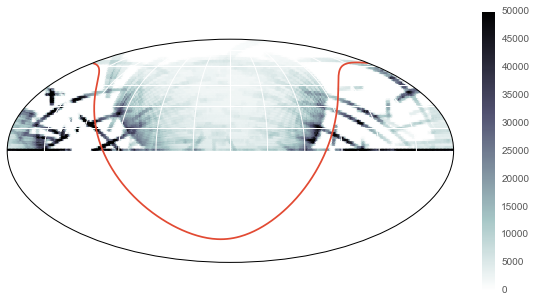

In [6]:
data_cols = ['ra', 'dec', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'petroMag_u',
             'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'extinction_r', 'petroRad_r']

feature_cols = ['psfMag_r_w14', 'psf_u_g_w14', 'psf_g_r_w14', 'psf_r_i_w14',
                'psf_i_z_w14', 'petroMag_r_w14', 'petro_u_g_w14', 'petro_g_r_w14',
                'petro_r_i_w14', 'petro_i_z_w14', 'petroRad_r']
    
pickle_paths = ['../pickle/05_class_proportion_estimation/galaxy_map.pickle',
                '../pickle/05_class_proportion_estimation/quasar_map.pickle',
                '../pickle/05_class_proportion_estimation/star_map.pickle']

fig_paths = [fig_dir + 'map_prediction_forest_all.png',
             fig_dir + 'map_prediction_forest_galaxies.png',
             fig_dir + 'map_prediction_forest_quasars.png',
             fig_dir + 'map_prediction_forest_stars.png']

targets = ['Galaxy', 'Quasar', 'Star']

if not results_exist(pickle_paths):
    predict_unlabelled_objects('../data/sdss_full.h5', 'sdss_full', classifier=forest, data_cols=data_cols,
        feature_cols=feature_cols, chunksize=50000, pickle_paths=pickle_paths, scaler_path=scaler_path)
    
galaxy_map, quasar_map, star_map = load_results(pickle_paths)
map_unlabelled_objects(galaxy_map, quasar_map, star_map, fig_paths)

Let's now correct for the class proportion. First we construct the normalised confusion matrix.

In [8]:
# order: galaxy, quasar star
confusion_matrix = np.array(
    [[97608,  1892,   500],
     [ 2801, 93376,  3823],
     [ 1633,  8878, 89489]])

class_total = confusion_matrix.sum(axis=0)
class_total = np.tile(class_total, (3, 1))
normalised_confusion = confusion_matrix / class_total
normalised_confusion

# put normalised confusion matrix in a DataFrame
classes = ['Galaxies', 'Quasars', 'Stars']
pred_index = pd.MultiIndex.from_tuples(list(zip(['Predicted'] * 3, classes)))
act_index = pd.MultiIndex.from_tuples(list(zip(['Actual'] * 3, classes)))
confusion_features_df = pd.DataFrame(normalised_confusion, columns=pred_index, index=act_index)

# display results
print('Here\'s the normalised confusion matrix:')
confusion_features_df.applymap(lambda x: '{:.1%}'.format(x))

Here's the normalised confusion matrix:


Predicted               
                 Galaxies Quasars  Stars
Actual Galaxies     95.7%    1.8%   0.5%
       Quasars       2.7%   89.7%   4.1%
       Stars         1.6%    8.5%  95.4%

Let's now correct for the potential misclassification.

In [9]:
total_galaxies = 357910241
total_quasars = 170020129
total_stars = 266083661
total = total_galaxies + total_quasars + total_stars
corrected_galaxies = int(normalised_confusion[0][0] * total_galaxies + \
                         normalised_confusion[0][1] * total_quasars + \
                         normalised_confusion[0][2] * total_stars)

corrected_quasars = int(normalised_confusion[1][0] * total_galaxies + \
                        normalised_confusion[1][1] * total_quasars + \
                        normalised_confusion[1][2] * total_stars)

corrected_stars = int(normalised_confusion[2][0] * total_galaxies + \
                      normalised_confusion[2][1] * total_quasars + \
                      normalised_confusion[2][2] * total_stars)

corrected_total = corrected_galaxies + corrected_quasars + corrected_stars
p_galaxies = corrected_galaxies / corrected_total
p_stars = corrected_stars / corrected_total
p_quasars = corrected_quasars / corrected_total

print('Adjusted number of predicted as galaxies: {:,} ({:.1%})'.format(p_galaxies * total, p_galaxies))
print('Adjusted number of predicted as stars: {:,} ({:.1%})'.format(p_stars * total, p_stars))
print('Adjusted number of predicted as quasars: {:,} ({:.1%})'.format(p_quasars * total, p_quasars))

Adjusted number of predicted as galaxies: 346,864,973.87369984 (43.7%)
Adjusted number of predicted as stars: 274,043,321.6902733 (34.5%)
Adjusted number of predicted as quasars: 173,105,735.4360269 (21.8%)


Proportion of the data that has been labelled

In [5]:
training = 1707233+714313+379456
100 * training / total

0.3527647989384208